<a href="https://colab.research.google.com/github/BlackCurrantDS/DBSE_Project/blob/main/OCT_data_secondN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd

In [110]:
#saved webhook data

In [111]:
webhook_df = pd.read_csv("/content/drive/My Drive/webhook_df_oct.csv",  skiprows=range(1, 100000), nrows=100000)

In [112]:
webhook_df.head(5)

,Unnamed: 0,external_id,event,data
0,99999,6159024905231228,AUTHORISATION,"{""additionalData"":{""fraudCheck-75-PaymentDetai..."
1,100000,4626024905434772,AUTHORISATION,"{""additionalData"":{""fraudCheck-75-PaymentDetai..."
2,100001,4726024905511354,AUTHORISATION,"{""additionalData"":{""fraudCheck-75-PaymentDetai..."
3,100002,4736024905567701,AUTHORISATION,"{""additionalData"":{""fraudCheck-52-DistinctPaym..."
4,100003,4756024906267751,AUTHORISATION,"{""additionalData"":{""fraudCheck-75-PaymentDetai..."


In [113]:
#remove index column
cols = [0]
webhook_df.drop(webhook_df.columns[cols],axis=1,inplace=True)

In [114]:
#getting only authorized transactions
webhook = webhook_df[webhook_df.event == 'AUTHORISATION']

In [115]:
webhook.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60199 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   external_id  60199 non-null  object
 1   event        60199 non-null  object
 2   data         60199 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


In [116]:
#getting saved dispute data for october

In [117]:
oct_disputes = pd.read_csv("/content/drive/My Drive/dispute_df_oct.csv")

In [118]:
oct_disputes.head(2)

,Unnamed: 0,company_account,merchant_account,psp_reference,merchant_reference,payment_method,record_date,record_date_timezone,dispute_currency,dispute_amount,record_type,dispute_psp_reference,dispute_reason,rfi_scheme_code,rfi_reason_code,cb_scheme_code,cb_reason_code,nof_scheme_code,nof_reason_code,payment_date,payment_date_timezone,payment_currency,payment_amount,dispute_date,dispute_date_timezone,dispute_arn,user_name,risk_scoring,shopper_interaction,shopper_name,shopper_email,shopper_reference,shopper_pan,iban,bic,shopper_ip,shopper_country,issuer_country,issuer_id,three_d_directory_response,three_d_authentication_response,cvc2_response,avs_response,dispute_auto_defended,dispute_end_date,dispute_end_date_timezone,reserved4,reserved5
0,0,RiideComp,RiideCompMP,1859020649491981,FINAL_PAYMENT_30811242,visa,2020-10-15 10:31:18+00:00,BST,EUR,9.14,NotificationOfFraud,7559026886734074,Fraudulent Use of Account Number,NaN,NaN,NaN,NaN,visa,6.0,2020-10-07 11:02:29+00:00,BST,GBP,8.4,2020-10-15 10:31:18+00:00,BST,74987500281000154677653,system,35,ContAuth,rhys thomas,kyrakelly20@outlook.com,RIIDE_USER_production_845203,100,NaN,NaN,NaN,NaN,GB,475140,NaN,NaN,0,6,NaN,2021-04-07 11:02:29+00:00,BST,NaN,NaN
1,1,RiideComp,RiideCompMP,1849014676254605,PREAUTH_production_1611974,visa,2020-10-15 10:29:34+00:00,BST,EUR,9.11,NotificationOfFraud,7549026885709328,Fraudulent Use of Account Number,NaN,NaN,NaN,NaN,visa,6.0,2020-09-30 13:07:05+00:00,BST,GBP,9.1,2020-10-15 10:29:34+00:00,BST,74987500274005078834941,system,-30,ContAuth,Lauren mulvihill,laurenthegreat2017@outlook.com,RIIDE_USER_production_1264991,5014,NaN,NaN,NaN,NaN,GB,465943,NaN,NaN,0,6,NaN,2021-03-30 13:07:05+00:00,BST,NaN,NaN


In [119]:
cols = [0]
oct_disputes.drop(oct_disputes.columns[cols],axis=1,inplace=True)

In [120]:
#getting chargebaks
chargebacks = oct_disputes[oct_disputes.record_type == 'Chargeback']

In [121]:
webhook['external_id'] = webhook['external_id'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
pd.merge(webhook, chargebacks, left_on='external_id', right_on='psp_reference') #looks like only 9 are chargebacks

,external_id,event,data,company_account,merchant_account,psp_reference,merchant_reference,payment_method,record_date,record_date_timezone,dispute_currency,dispute_amount,record_type,dispute_psp_reference,dispute_reason,rfi_scheme_code,rfi_reason_code,cb_scheme_code,cb_reason_code,nof_scheme_code,nof_reason_code,payment_date,payment_date_timezone,payment_currency,payment_amount,dispute_date,dispute_date_timezone,dispute_arn,user_name,risk_scoring,shopper_interaction,shopper_name,shopper_email,shopper_reference,shopper_pan,iban,bic,shopper_ip,shopper_country,issuer_country,issuer_id,three_d_directory_response,three_d_authentication_response,cvc2_response,avs_response,dispute_auto_defended,dispute_end_date,dispute_end_date_timezone,reserved4,reserved5
0,1339035313665462,AUTHORISATION,"{""additionalData"":{""fraudCheck-52-DistinctPaym...",RiideComp,RiideCompMP,1339035313665462,PREAUTH_production_1864086,visa,2021-01-14 06:19:48+00:00,GMT,EUR,4.56,Chargeback,7436104676463060,Other Fraud-Card Absent Environment,NaN,NaN,visa,10.4,NaN,NaN,2020-10-24 10:22:46+00:00,BST,GBP,4.5,2021-01-13 04:40:59+00:00,GMT,74987500298003442128738,system,35,ContAuth,e a dinsdale,beckymarsden123@hotmail.com,RIIDE_USER_production_423304,5024,NaN,NaN,NaN,NaN,GB,454742,NaN,NaN,0,6,NaN,2021-01-31 04:40:59+00:00,GMT,NaN,NaN
1,1749036467978143,AUTHORISATION,"{""additionalData"":{""fraudCheck-52-DistinctPaym...",RiideComp,RiideCompMP,1749036467978143,PREAUTH_production_1881704,visa,2020-10-30 06:24:48+00:00,GMT,EUR,19.25,Chargeback,7549039018760654,Other Fraud-Card Absent Environment,NaN,NaN,visa,10.4,NaN,NaN,2020-10-25 17:26:37+00:00,GMT,GBP,8.8,2020-10-28 16:30:48+00:00,GMT,74987500299007404324945,system,10,ContAuth,a antt,antt18804@gmail.com,RIIDE_USER_production_1813695,7114,NaN,NaN,NaN,NaN,GB,465942,NaN,NaN,0,6,NaN,2020-11-15 16:30:48+00:00,GMT,NaN,NaN
2,1749020310512796,AUTHORISATION,"{""additionalData"":{""metadata.booking_id"":""3079...",RiideComp,RiideCompMP,1749020310512796,FINAL_PAYMENT_30797514,visa,2020-10-22 13:48:51+00:00,BST,EUR,8.98,Chargeback,7549032068247094,Other Fraud-Card Absent Environment,NaN,NaN,visa,10.4,NaN,NaN,2020-10-07 01:37:31+00:00,BST,GBP,8.1,2020-10-20 19:30:58+00:00,BST,74987500281000010017649,system,35,ContAuth,Alistair Roxburgh,lewisjoanna519@gmail.com,RIIDE_USER_production_1759497,1601,NaN,NaN,NaN,NaN,GB,465935,NaN,NaN,0,7,NaN,2020-11-07 19:30:58+00:00,GMT,NaN,NaN
3,1656037427390628,AUTHORISATION,"{""additionalData"":{""metadata.booking_id"":""3179...",RiideComp,RiideCompMP,1656037427390628,FINAL_PAYMENT_31791774,visa,2020-11-04 09:49:30+00:00,GMT,EUR,31.17,Chargeback,7559041610313194,Other Fraud-Card Absent Environment,NaN,NaN,visa,10.4,NaN,NaN,2020-10-26 20:05:39+00:00,GMT,GBP,28.0,2020-10-31 16:21:57+00:00,GMT,74987500300358115527350,system,5,ContAuth,William newnes,agerada78@gmail.com,RIIDE_USER_production_1813588,5713,NaN,NaN,NaN,NaN,GB,476367,NaN,NaN,0,6,NaN,2020-11-18 16:21:57+00:00,GMT,NaN,NaN
4,1359039953970328,AUTHORISATION,"{""additionalData"":{""fraudCheck-75-PaymentDetai...",RiideComp,RiideCompMP,1359039953970328,PREAUTH_production_1920803,visa,2020-11-17 08:28:08+00:00,GMT,EUR,12.64,Chargeback,7559052845342247,Other Fraud-Card Absent Environment,NaN,NaN,visa,10.4,NaN,NaN,2020-10-29 18:16:37+00:00,GMT,GBP,8.5,2020-11-13 19:19:36+00:00,GMT,74987500303010668925856,system,70,ContAuth,julian fletcher,NaN,RIIDE_USER_production_1740993,2440,NaN,NaN,NaN,NaN,GB,475129,NaN,NaN,0,2,NaN,2020-12-01 19:19:36+00:00,GMT,NaN,NaN


In [123]:
result = pd.merge(webhook, chargebacks, how = 'left',left_on='external_id', right_on='psp_reference')

In [124]:
result = result[['external_id', 'event', 'data', 'psp_reference']]

In [125]:
result.head()

,external_id,event,data,psp_reference
0,6159024905231228,AUTHORISATION,"{""additionalData"":{""fraudCheck-75-PaymentDetai...",NaN
1,4626024905434772,AUTHORISATION,"{""additionalData"":{""fraudCheck-75-PaymentDetai...",NaN
2,4726024905511354,AUTHORISATION,"{""additionalData"":{""fraudCheck-75-PaymentDetai...",NaN
3,4736024905567701,AUTHORISATION,"{""additionalData"":{""fraudCheck-52-DistinctPaym...",NaN
4,4756024906267751,AUTHORISATION,"{""additionalData"":{""fraudCheck-75-PaymentDetai...",NaN


In [126]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60199 entries, 0 to 60198
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   external_id    60199 non-null  int64  
 1   event          60199 non-null  object 
 2   data           60199 non-null  object 
 3   psp_reference  5 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [127]:
result.columns = ['external_id', 'event', 'data', 'chargeback']

In [128]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60199 entries, 0 to 60198
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   external_id  60199 non-null  int64  
 1   event        60199 non-null  object 
 2   data         60199 non-null  object 
 3   chargeback   5 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [129]:
result.chargeback.fillna(0,inplace=True)

In [130]:
result["chargeback"]=result["chargeback"].apply(lambda x: 1 if x!=0 else 0)

In [131]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60199 entries, 0 to 60198
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   external_id  60199 non-null  int64 
 1   event        60199 non-null  object
 2   data         60199 non-null  object
 3   chargeback   60199 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [132]:
result['chargeback'].value_counts()

0    60194
1        5
Name: chargeback, dtype: int64

plotting with labels

In [133]:
import seaborn as sns

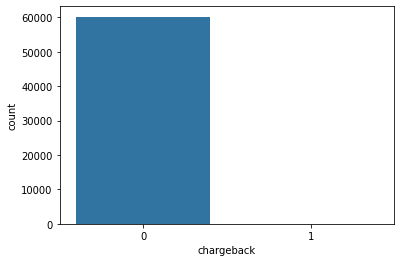

In [134]:
sns.countplot(x = 'chargeback', data = result)

In [135]:
#normalisation

In [136]:
import json
import numpy as np
from pandas.io.json import json_normalize

In [137]:
flat_df = json_normalize(result.data.apply(json.loads))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [138]:
flat_df.head()

,eventCode,eventDate,merchantAccountCode,merchantReference,operations,paymentMethod,pspReference,reason,success,additionalData.fraudCheck-75-PaymentDetailCarteBancaireRefCheck,additionalData.eci,additionalData.refusalReasonRaw,additionalData.metadata.company,additionalData.metadata.booking_id,additionalData.fraudCheck-63-TransactionAmountCheck,additionalData.xid,additionalData.fraudCheck-52-DistinctPaymentDetailUsageByShopper,additionalData.recurringProcessingModel,additionalData.threeDAuthenticated,additionalData.metadata.icabbi_payment_id,additionalData.paymentMethodVariant,additionalData.riskdata.basket.item.brand,additionalData.fraudCheck-91-ShopperStrongAuthenticationCheck,additionalData.riskdata.shopperAppVersion,additionalData.deviceType,additionalData.metadata.shopper_name,additionalData.fraudCheck-54-DistinctSharedPaymentDetailUsageByShopper,additionalData.metadata.shopper_phone,additionalData.fraudCheck-77-EmailSyntaxCheck,additionalData.fraudManualReview,additionalData.threeDOffered,additionalData.threeDOfferedResponse,additionalData.shopperEmail,additionalData.fraudCheck-86-PaymentDetailAmexRefCheck,additionalData.cavv,additionalData.fraudCheck-46-DistinctCountryUsageByShopper,additionalData.shopperTelephone,additionalData.threeDAuthenticatedResponse,additionalData.fraudCheck-53-DistinctSharedShopperIpUsageByShopper,additionalData.retry.attempt1.rawResponse,...,additionalData.riskdata.numberFieldKeyCount,additionalData.recurring.recurringDetailReference,additionalData.fraudCheck-2-CardChunkUsage,additionalData.riskdata.referrer,additionalData.riskdata.luhnCount,additionalData.riskdata.LuhnSameLengthCount,additionalData.fraudCheck-3-PaymentDetailUsage,additionalData.riskdata.numberFieldFocusCount,additionalData.riskdata.initializeCount,additionalData.recurring.shopperReference,additionalData.fraudCheck-55-ShopperAuthorisedFrequency,additionalData.cardIssuingCurrency,additionalData.riskProfile,additionalData.riskProfileReference,additionalData.metadata.link_id,additionalData.cvcResultRaw,additionalData.fraudCheck-4-HolderNameUsage,additionalData.riskdata.numberFieldClickCount,additionalData.cardIssuingCountry,additionalData.cardIssuingBank,additionalData.fraudCheck-78-ShopperBehaviorCheck,additionalData.riskdata.numberFieldBlurCount,additionalData.cardPaymentMethod,additionalData.riskdata.numberFieldLog,additionalData.accountValidation,additionalData.fraudCheck-8-ShopperEmailUsage,additionalData.coBrandedWith,additionalData.retry.attempt2.responseCode,additionalData.retry.attempt2.rawResponse,additionalData.retry.attempt2.acquirerAccount,additionalData.retry.attempt2.acquirer,additionalData.metadata.caboodle_base_uri,additionalData.metadata.restaurant_id,additionalData.retry.attempt2.avsResultRaw,additionalData.threeDSVersion,additionalData.fraudCheck--1-Pre-Auth-Risk-Total,additionalData.riskdata.numberFieldEventHandlers,additionalData.riskdata.numberFieldUnknownKeys,additionalData.authorisedAmountCurrency,additionalData.authorisedAmountValue
0,AUTHORISATION,2020-10-12T10:15:23+02:00,RiideCompMP,FINAL_PAYMENT_31079730,"[CANCEL, CAPTURE, REFUND]",visa,6159024905231228,004038:3972:12/2024,true,0,N/A,00 : Approved or completed successfully,asl,31079730,0,N/A,0,CardOnFile,false,53576144,visastandarddebit,asl,0,333.0.705,Other,James Fox,0,7944633008,20,false,false,N/A,Jfox2707@gmail.com,0,N/A,0,+447944633008,N/A,0,00 : Approved or completed successfully,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUTHORISATION,2020-10-12T10:15:43+02:00,RiideCompMP,PREAUTH_production_1741939,"[CANCEL, CAPTURE, REFUND]",visa,4626024905434772,012036:1126:10/2021,true,0,N/A,00 : Approved or completed successfully,blueline,NaN,0,N/A,0,CardOnFile,false,NaN,visastandarddebit,blueline,0,333.0.705,Other,Sara Hawthorn,0,7522247994,0,false,false,N/A,sarahawthorn@hotmail.co.uk,0,N/A,0,+447522247994,N/A,0,00 : Approved or complete

In [139]:
new_df = result[['external_id', 'chargeback']]

In [140]:
flat_df['pspReference']=flat_df['pspReference'].astype('int64')

In [141]:
final_df = pd.merge(new_df, flat_df, left_on='external_id', right_on='pspReference')

In [142]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60221 entries, 0 to 60220
Columns: 160 entries, external_id to additionalData.authorisedAmountValue
dtypes: int64(4), object(156)
memory usage: 74.0+ MB


In [143]:
final_df[final_df['chargeback']==1 ].head()

,external_id,chargeback,eventCode,eventDate,merchantAccountCode,merchantReference,operations,paymentMethod,pspReference,reason,success,additionalData.fraudCheck-75-PaymentDetailCarteBancaireRefCheck,additionalData.eci,additionalData.refusalReasonRaw,additionalData.metadata.company,additionalData.metadata.booking_id,additionalData.fraudCheck-63-TransactionAmountCheck,additionalData.xid,additionalData.fraudCheck-52-DistinctPaymentDetailUsageByShopper,additionalData.recurringProcessingModel,additionalData.threeDAuthenticated,additionalData.metadata.icabbi_payment_id,additionalData.paymentMethodVariant,additionalData.riskdata.basket.item.brand,additionalData.fraudCheck-91-ShopperStrongAuthenticationCheck,additionalData.riskdata.shopperAppVersion,additionalData.deviceType,additionalData.metadata.shopper_name,additionalData.fraudCheck-54-DistinctSharedPaymentDetailUsageByShopper,additionalData.metadata.shopper_phone,additionalData.fraudCheck-77-EmailSyntaxCheck,additionalData.fraudManualReview,additionalData.threeDOffered,additionalData.threeDOfferedResponse,additionalData.shopperEmail,additionalData.fraudCheck-86-PaymentDetailAmexRefCheck,additionalData.cavv,additionalData.fraudCheck-46-DistinctCountryUsageByShopper,additionalData.shopperTelephone,additionalData.threeDAuthenticatedResponse,...,additionalData.riskdata.numberFieldKeyCount,additionalData.recurring.recurringDetailReference,additionalData.fraudCheck-2-CardChunkUsage,additionalData.riskdata.referrer,additionalData.riskdata.luhnCount,additionalData.riskdata.LuhnSameLengthCount,additionalData.fraudCheck-3-PaymentDetailUsage,additionalData.riskdata.numberFieldFocusCount,additionalData.riskdata.initializeCount,additionalData.recurring.shopperReference,additionalData.fraudCheck-55-ShopperAuthorisedFrequency,additionalData.cardIssuingCurrency,additionalData.riskProfile,additionalData.riskProfileReference,additionalData.metadata.link_id,additionalData.cvcResultRaw,additionalData.fraudCheck-4-HolderNameUsage,additionalData.riskdata.numberFieldClickCount,additionalData.cardIssuingCountry,additionalData.cardIssuingBank,additionalData.fraudCheck-78-ShopperBehaviorCheck,additionalData.riskdata.numberFieldBlurCount,additionalData.cardPaymentMethod,additionalData.riskdata.numberFieldLog,additionalData.accountValidation,additionalData.fraudCheck-8-ShopperEmailUsage,additionalData.coBrandedWith,additionalData.retry.attempt2.responseCode,additionalData.retry.attempt2.rawResponse,additionalData.retry.attempt2.acquirerAccount,additionalData.retry.attempt2.acquirer,additionalData.metadata.caboodle_base_uri,additionalData.metadata.restaurant_id,additionalData.retry.attempt2.avsResultRaw,additionalData.threeDSVersion,additionalData.fraudCheck--1-Pre-Auth-Risk-Total,additionalData.riskdata.numberFieldEventHandlers,additionalData.riskdata.numberFieldUnknownKeys,additionalData.authorisedAmountCurrency,additionalData.authorisedAmountValue
35838,1339035313665462,1,AUTHORISATION,2020-10-24T11:22:46+02:00,RiideCompMP,PREAUTH_production_1864086,"[CANCEL, CAPTURE, REFUND]",visa,1339035313665462,766845:5024:09/2021,true,0,N/A,00 : Approved or completed successfully,clubm,NaN,0,N/A,0,CardOnFile,false,NaN,visastandarddebit,clubm,0,333.0.705,Other,Becky Marsom,0,7909172744,0,false,false,N/A,beckymarsden123@hotmail.com,0,N/A,0,+447909172744,N/A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39271,1749036467978143,1,AUTHORISATION,2020-10-25T18:26:37+01:00,RiideCompMP,PREAUTH_production_1881704,"[CANCEL, CAPTURE, REFUND]",visa,1749036467978143,004544:7114:07/2022,true,0,N/A,00 : Approved or completed successfully,clubm,NaN,0,N/A,0,CardOnFile,false,NaN,visastandarddebit,clubm,0,33.0.1359,Other,antt antt,0,7944351365,40,false,false,N/A,antt18804@gmail.com,0,N/A,0,+447944351365,N/A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Dropping continous columns

In [144]:
final_df=final_df.rename(columns=lambda x:x.replace('additionalData.',''))

In [145]:
final_df.head(1)

,external_id,chargeback,eventCode,eventDate,merchantAccountCode,merchantReference,operations,paymentMethod,pspReference,reason,success,fraudCheck-75-PaymentDetailCarteBancaireRefCheck,eci,refusalReasonRaw,metadata.company,metadata.booking_id,fraudCheck-63-TransactionAmountCheck,xid,fraudCheck-52-DistinctPaymentDetailUsageByShopper,recurringProcessingModel,threeDAuthenticated,metadata.icabbi_payment_id,paymentMethodVariant,riskdata.basket.item.brand,fraudCheck-91-ShopperStrongAuthenticationCheck,riskdata.shopperAppVersion,deviceType,metadata.shopper_name,fraudCheck-54-DistinctSharedPaymentDetailUsageByShopper,metadata.shopper_phone,fraudCheck-77-EmailSyntaxCheck,fraudManualReview,threeDOffered,threeDOfferedResponse,shopperEmail,fraudCheck-86-PaymentDetailAmexRefCheck,cavv,fraudCheck-46-DistinctCountryUsageByShopper,shopperTelephone,threeDAuthenticatedResponse,...,riskdata.numberFieldKeyCount,recurring.recurringDetailReference,fraudCheck-2-CardChunkUsage,riskdata.referrer,riskdata.luhnCount,riskdata.LuhnSameLengthCount,fraudCheck-3-PaymentDetailUsage,riskdata.numberFieldFocusCount,riskdata.initializeCount,recurring.shopperReference,fraudCheck-55-ShopperAuthorisedFrequency,cardIssuingCurrency,riskProfile,riskProfileReference,metadata.link_id,cvcResultRaw,fraudCheck-4-HolderNameUsage,riskdata.numberFieldClickCount,cardIssuingCountry,cardIssuingBank,fraudCheck-78-ShopperBehaviorCheck,riskdata.numberFieldBlurCount,cardPaymentMethod,riskdata.numberFieldLog,accountValidation,fraudCheck-8-ShopperEmailUsage,coBrandedWith,retry.attempt2.responseCode,retry.attempt2.rawResponse,retry.attempt2.acquirerAccount,retry.attempt2.acquirer,metadata.caboodle_base_uri,metadata.restaurant_id,retry.attempt2.avsResultRaw,threeDSVersion,fraudCheck--1-Pre-Auth-Risk-Total,riskdata.numberFieldEventHandlers,riskdata.numberFieldUnknownKeys,authorisedAmountCurrency,authorisedAmountValue
0,6159024905231228,0,AUTHORISATION,2020-10-12T10:15:23+02:00,RiideCompMP,FINAL_PAYMENT_31079730,"[CANCEL, CAPTURE, REFUND]",visa,6159024905231228,004038:3972:12/2024,true,0,N/A,00 : Approved or completed successfully,asl,31079730,0,N/A,0,CardOnFile,false,53576144,visastandarddebit,asl,0,333.0.705,Other,James Fox,0,7944633008,20,false,false,N/A,Jfox2707@gmail.com,0,N/A,0,+447944633008,N/A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
final_df = final_df.drop( [
#dropping few columns with continous data
#'pspReference',
#'external_id', 
'metadata.booking_no',
'metadata.link_id', 
'metadata.booking_id',
'metadata.payment_id',
'acquirerReference',
'metadata.type',
'PaymentAccountReference',
'fraudResultType',
'metadata.shopper_riide_id',
'metadata.icabbi_payment_id', 
'metadata.preauth_id',
#'metadata.payment_relation_id',
'riskProfileReference',
#'riskExperimentReference',
'cavv','success','riskProfile',
'metadata.caboodle_base_uri',
'metadata.riide_url',
'totalFraudScore',
'hmacSignature',
'recurring.recurringDetailReference',
'authCode',
'recurring.shopperReference',
'operations',
'merchantReference',
'retry.attempt1.acquirer',
'riskdata.basket.item.itemID',
'merchantAccountCode',
'riskdata.referrer',
'aliasType',
#reason has few values as fraud with some numbers
'reason',
#some wired noise
#'metadata.splits',
#continous alphnumeric column
#'metadata.payment_relation_type' 
'alias',
#'shopperReference',
#duplicate column saem as bracd and company
'shopperStatement',
# useless
'fraudManualReview',
'cardSummary',
'cvcResult',
'xid',
'cardBin',
#app version is not worth exploring i think
'riskdata.shopperAppVersion'
,'captureDelayHours',
'metadata.auto_capture',
'billingAddress.street',
'billingAddress.city',
'billingAddress.houseNumberOrName',
'accountValidation',
'metadata.restaurant_id',
#dropping columns with 3DS
'threeDOfferedResponse','threeDAuthenticatedResponse','threeDSVersion',
'threeDAuthenticated','threeDOffered'

],axis=1)

In [147]:
spike_cols = [col for col in final_df.columns if 'splits' in col]
print(spike_cols)

[]


Adding Card holder name and shopper name

In [148]:
final_df['shp_card_name_match'] = final_df['cardHolderName'].str.lower() == final_df['metadata.shopper_name'].str.lower()

Dropping event code

In [149]:
final_df = final_df.drop('eventCode', axis=1)

iSCard Commericial

In [150]:
#updating values to all caps for isommercial
final_df['isCardCommercial'] = final_df['isCardCommercial'].str.upper() 

In [151]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['cardtype'] = le.fit_transform(final_df['isCardCommercial'].astype(str))

Email Domain

In [152]:
final_df['emaildomain'] = final_df['shopperEmail'].str.split('@').str[1].str.upper()

In [153]:
def label_states (row):
    if "GMAIL" in row['emaildomain']:
        return 'GMAIL'
    elif "GOOGLE" in row['emaildomain']:
        return 'GOOGLE'
    elif "YAHOO" in row['emaildomain']:
        return 'YAHOO'
    elif "HOTMAIL" in row['emaildomain']:
        return "HOTMAIL"
    elif "OUTLOOK" in row['emaildomain']:
        return "OUTLOOK"
    elif "AOL" in row['emaildomain']:
        return "AOL"
    elif "ICLOUD" in row['emaildomain']:
        return "ICLOUD"
    elif "LIVE" in row['emaildomain']:
        return "LIVE"
    elif "_" in row['emaildomain']:
        return "MissingValue"
    else:
        return 'OTHERS'

In [154]:
final_df['emaildomain'] = final_df['emaildomain'].fillna('_')

In [155]:
final_df['emaildomainlabel'] = final_df.apply(lambda row: label_states(row), axis=1)

Validate email

In [156]:
pip install validate_email

In [157]:
from validate_email import validate_email

In [158]:
final_df['email_is_valid'] = final_df['shopperEmail'].astype(str).apply(lambda x: validate_email(x))

Shopper Account Creation Date

In [159]:
final_df["AccountCreationDate"] = final_df["riskdata.shopperAccountCreationDate"].astype("datetime64")

In [160]:
#how long shopper has been with us
from datetime import date
import numpy as np
now = date.today()
final_df['ageyear'] = (pd.to_datetime('now') - pd.to_datetime(final_df['AccountCreationDate'])) / np.timedelta64(1, 'Y')
final_df['agemonth'] = (pd.to_datetime('now') - pd.to_datetime(final_df['AccountCreationDate'])) / np.timedelta64(1, 'M')
final_df['agedays'] = (pd.to_datetime('now') - pd.to_datetime(final_df['AccountCreationDate'])) / np.timedelta64(1, 'D')

Expiry date

In [161]:
final_df['expiryyear'] = final_df['expiryDate'].str.split('/').str[1]

In [162]:
from datetime import datetime

In [163]:
final_df.expiryDate[final_df.expiryDate=='00/0000'] = ''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [164]:
final_df.expiryDate[final_df.expiryDate==''] = '01/9999'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [165]:
final_df['cardexdate'] =  final_df['expiryDate'].apply(lambda x:datetime.strptime(x,'%m/%Y'))

In [166]:
final_df['howlongtillcardExpiry'] = (pd.to_datetime(final_df['cardexdate'],errors = 'coerce') - pd.to_datetime(final_df['AccountCreationDate'],errors = 'coerce')) / np.timedelta64(1, 'M')

In [167]:
final_df['howlongtillcardExpiry'] = round(final_df['howlongtillcardExpiry']).fillna(0).astype(int)

Trying time of the date for Event Date

In [168]:
pip install ciso8601


In [169]:
import ciso8601

In [170]:
final_df['transdate'] = final_df['eventDate'].apply(lambda x:ciso8601.parse_datetime(x).strftime("%Y-%m-%d"))

In [171]:
#getting hour of the transaction date
final_df['transtime'] = final_df['eventDate'].apply(lambda x:ciso8601.parse_datetime(x).hour)

In [172]:
#getting day of the transaction date
final_df['transweekday'] = final_df['eventDate'].apply(lambda x:ciso8601.parse_datetime(x).weekday())

In [173]:
#getting month day of the transaction date
final_df['transmonthday'] = final_df['eventDate'].apply(lambda x:ciso8601.parse_datetime(x).day)

In [174]:
final_df['transyear'] = final_df['eventDate'].apply(lambda x:ciso8601.parse_datetime(x).year)

Account creation date and transaction date relation

In [175]:
final_df['ageyear_trans'] = round((pd.to_datetime(final_df['transdate']) - pd.to_datetime(final_df['AccountCreationDate'])) / np.timedelta64(1, 'Y')).astype('Int64')
final_df['agemonth_trans'] = round((pd.to_datetime(final_df['transdate']) - pd.to_datetime(final_df['AccountCreationDate'])) / np.timedelta64(1, 'M')).astype('Int64')
final_df['agedays_trans'] = round((pd.to_datetime(final_df['transdate']) - pd.to_datetime(final_df['AccountCreationDate'])) / np.timedelta64(1, 'D')).astype('Int64')

In [176]:
final_df['agedays_trans'] =final_df['agedays_trans'].fillna(000)

In [177]:
final_df['agemonth_trans'] =final_df['agemonth_trans'].fillna(000)

Amount

In [178]:
final_df['amount.value'] = final_df['amount.value'].astype(float)
final_df['authorisedAmountValue'] = final_df['authorisedAmountValue'].astype(float)

In [179]:
final_df['amount'] = final_df['amount.value']

In [180]:
final_df['amount']=final_df['amount'].fillna(0)

In [181]:
final_df['amount']=final_df['amount'].apply(np.log)

In [182]:
final_df['amount'] = final_df['amount'].replace(-np.inf, np.nan)

Device Type

In [183]:
def label_devicetype(row):
    if row['riskdata.shopperDevice'].isdigit():
        return 'NameOnlyDigit'
    elif "ARMOR" in row['riskdata.shopperDevice']:
        return 'ARMOR'
    elif "IPAD" in row['riskdata.shopperDevice']:
        return 'IPAD'
    elif "IPHONE12" in row['riskdata.shopperDevice']:
        return "IPHONE12"
    elif "IPHONE11" in row['riskdata.shopperDevice']:
        return "IPHONE11"
    elif "IPHONE11" in row['riskdata.shopperDevice']:
        return "IPHONE11"
    elif "IPHONE10" in row['riskdata.shopperDevice']:
        return "IPHONE10"
    elif "IPHONE9" in row['riskdata.shopperDevice']:
        return "IPHONE9"
    elif "IPHONE8" in row['riskdata.shopperDevice']:
        return "IPHONE8"
    elif "IPHONE" in row['riskdata.shopperDevice']:
        return "SomeKindOfIPHONE"
    elif "ONEPLUS" in row['riskdata.shopperDevice']:
        return "ONEPLUS"
    elif "_" in row['riskdata.shopperDevice']:
        return "MissingValue"
    else:
        return 'OTHERS'

In [184]:
final_df['riskdata.shopperDevice'] = final_df['riskdata.shopperDevice'].fillna('_')

In [185]:
final_df['shopperDevicebin'] = final_df.apply(lambda row: label_devicetype(row.str.upper()), axis=1) 

Billing address postal code

In [186]:
pip install pgeocode

In [187]:
import pgeocode

In [188]:
def insert_space(string, integer):
  return string[0:integer] + ' ' + string[integer:]
nomi = pgeocode.Nominatim('gb')

In [189]:
final_df['billingAddress.postalCode'] = final_df['billingAddress.postalCode'].fillna(000)

In [190]:
final_df['state_name'] = final_df['billingAddress.postalCode'].apply(lambda x:nomi.query_postal_code(insert_space(str(x),-3)).state_name)

In [191]:
final_df['place_name'] = final_df['billingAddress.postalCode'].apply(lambda x:nomi.query_postal_code(insert_space(str(x),-3)).place_name)

In [192]:
final_df['county_name'] = final_df['billingAddress.postalCode'].apply(lambda x:nomi.query_postal_code(insert_space(str(x),-3)).county_name)

In [193]:
final_df['place_name_short'] =  final_df['place_name'].apply(lambda x:str(x).split(',')[0])

Billing city

In [194]:
#getting first name
start = 'first name='
end = ', infix'
final_df['firstname'] =  final_df['shopperName'].astype(str).apply(lambda x:x[x.find(start)+len(start):x.rfind(end)])

In [195]:
#getting  last name
start = 'last name='
end = ', gender'
final_df['lastname'] =  final_df['shopperName'].astype(str).apply(lambda x:x[x.find(start)+len(start):x.rfind(end)])

In [196]:
#getting  infix
start = 'infix='
end = ', last name'
final_df['infix'] =  final_df['shopperName'].astype(str).apply(lambda x:x[x.find(start)+len(start):x.rfind(end)])

In [197]:
#lenght of first name , last name, infix 
final_df['firstnamelen'] = final_df['firstname'].map(len)
final_df['lastnamelen'] = final_df['lastname'].map(len)
final_df['infixlen'] = final_df['infix'].map(len)

In [198]:
final_df['first_last_name_len_match'] = final_df['firstnamelen'] == final_df['lastnamelen']

In [199]:
#check if first name is same as last name
final_df['same_firs_last_name'] = final_df['firstname'].str.strip().str.lower() == final_df['lastname'].str.strip().str.lower()

In [200]:
#does email has first name of last name?
final_df['emailfirstpart'] = final_df['shopperEmail'].astype(str).apply(lambda x:(x.split('@')[0]))
final_df['emailhaspartofFname'] = final_df.apply(lambda x: str(x.emailfirstpart) in str(x.firstname), axis=1)
final_df['emailhaspartofLname'] = final_df.apply(lambda x: str(x.emailfirstpart) in str(x.lastname), axis=1)

In [201]:
def func(x):
    return df['firstname'] in list(df['cardHolderName'])

In [202]:
final_df['cardname_has_firstname'] = final_df.apply(lambda x: str(x.firstname) in str(x.cardHolderName), axis=1)

In [203]:
final_df['cardname_has_lastname'] = final_df.apply(lambda x: str(x.lastname) in str(x.cardHolderName), axis=1)

In [204]:
def hasNumbers(inputString):
  return any(char.isdigit() for char in inputString)

In [205]:
final_df['namehasdigit'] = final_df['metadata.shopper_name'].astype(str).apply(lambda x:hasNumbers(x))

In [206]:
final_df['emaillen'] = final_df['shopperEmail'].astype(str).apply(lambda x:len(x.split('@')[0]))

Dropping more columns

In [207]:
final_df = final_df.drop( ['riskdata.luhnOkCount',
 'riskdata.luhnCount',
 'riskdata.LuhnSameLengthCount',
 'riskdata.numberFieldClickCount',
 'riskdata.numberFieldKeyCount',
 'riskdata.numberFieldFocusCount',
 'riskdata.initializeCount',
 'riskdata.numberFieldLog',
 'riskdata.basket.item.brand',
 'riskdata.numberFieldEventHandlers',
 'riskdata.numberFieldUnknownKeys',
 'riskdata.numberFieldBlurCount' ], axis=1)

In [208]:
#fraud check columns
cols = [i for i in final_df.columns if 'fraud' in i]
cols

['fraudCheck-75-PaymentDetailCarteBancaireRefCheck',
 'fraudCheck-63-TransactionAmountCheck',
 'fraudCheck-52-DistinctPaymentDetailUsageByShopper',
 'fraudCheck-91-ShopperStrongAuthenticationCheck',
 'fraudCheck-54-DistinctSharedPaymentDetailUsageByShopper',
 'fraudCheck-77-EmailSyntaxCheck',
 'fraudCheck-86-PaymentDetailAmexRefCheck',
 'fraudCheck-46-DistinctCountryUsageByShopper',
 'fraudCheck-53-DistinctSharedShopperIpUsageByShopper',
 'fraudCheck-50-DistinctShopperEmailUsageByShopper',
 'fraudCheck-48-ChargebackCountByShopper',
 'fraudCheck-41-PaymentDetailNonFraudRefCheck',
 'fraudCheck-74-EmailNameCheck',
 'fraudCheck-56-ShopperReferenceCheck',
 'fraudCheck-79-BinAttackRefCheck',
 'fraudCheck-65-EmailDomainRefCheck',
 'fraudCheck-15-IssuingCountryReferral',
 'fraudCheck-47-BlockedCardsUsageByShopper',
 'fraudCheck-26-ShopperEmailRefCheck',
 'fraudCheck-85-ShopperFraudRefusalsCheck',
 'fraudCheck-51-DistinctShopperReferenceUsageByShopper',
 'fraudCheck-13-IssuerRefCheck',
 'fraudC

In [209]:
final_df = final_df.drop(cols,axis=1)

In [210]:
cols = [i for i in final_df.columns if 'retry' in i]
cols

['retry.attempt1.rawResponse',
 'retry.attempt1.avsResultRaw',
 'retry.attempt1.acquirerAccount',
 'retry.attempt1.responseCode',
 'retry.attempt2.responseCode',
 'retry.attempt2.rawResponse',
 'retry.attempt2.acquirerAccount',
 'retry.attempt2.acquirer',
 'retry.attempt2.avsResultRaw']

In [211]:
final_df =final_df.drop( cols, axis=1)

In [212]:
#more columns to remove, but may be remove from fittin before the model
final_df = final_df.drop(['eventDate', 'shopperEmail', 'avsResult', 'cavvAlgorithm'
, 'liabilityShift', 'cardHolderName', 'visaTemplate', 'acquirerCode', 'eci', 'refusalReasonRaw',
'recurringProcessingModel', 'shopperTelephone', 'fundingSource', 'shopperName', 'shopperInteraction',
'cvcResultRaw', 'billingAddress.country', 'metadata.shopper_name', 'avsResultRaw', 'metadata.driver_ref',
'metadata.shopper_ph_country', 'riskdata.shopperAccountCreationDate', 'metadata.shopper_phone',
'billingAddress.postalCode', 
#'metadata.shopper_phone_country', 
'authorisedAmountValue', 'emaildomain'

]   ,axis=1)

In [213]:
final_df.to_csv("/content/drive/My Drive/oct_train_secondN.csv")

In [214]:
final_df.head(2)

,external_id,chargeback,paymentMethod,pspReference,metadata.company,paymentMethodVariant,deviceType,shopperReference,expiryDate,isCardCommercial,browserCode,issuerCountry,riskdata.shopperDevice,amount.currency,amount.value,cardIssuingCurrency,cardIssuingCountry,cardIssuingBank,cardPaymentMethod,coBrandedWith,authorisedAmountCurrency,shp_card_name_match,cardtype,emaildomainlabel,email_is_valid,AccountCreationDate,ageyear,agemonth,agedays,expiryyear,cardexdate,howlongtillcardExpiry,transdate,transtime,transweekday,transmonthday,transyear,ageyear_trans,agemonth_trans,agedays_trans,amount,shopperDevicebin,state_name,place_name,county_name,place_name_short,firstname,lastname,infix,firstnamelen,lastnamelen,infixlen,first_last_name_len_match,same_firs_last_name,emailfirstpart,emailhaspartofFname,emailhaspartofLname,cardname_has_firstname,cardname_has_lastname,namehasdigit,emaillen
0,6159024905231228,0,visa,6159024905231228,asl,visastandarddebit,Other,cus_EuLdXOqEx3JHTX,12/2024,FALSE,Other,GB,"iPhone10,4",GBP,115.0,NaN,NaN,NaN,NaN,NaN,NaN,False,0,GMAIL,True,2020-06-03 07:58:09,0.822091,9.865086,300.262403,2024,2024-12-01,54,2020-10-12,10,0,12,2020,0,4,131,4.744932,IPHONE10,NaN,NaN,NaN,nan,James,Fox,null,5,3,4,False,False,Jfox2707,False,False,False,True,False,8
1,4626024905434772,0,visa,4626024905434772,blueline,visastandarddebit,Other,cus_FkVtfFczI07hvi,10/2021,FALSE,Other,GB,"iPhone12,3",GBP,500.0,NaN,NaN,NaN,NaN,NaN,NaN,False,0,HOTMAIL,True,2019-09-16 07:55:38,1.536689,18.440269,561.264150,2021,2021-10-01,24,2020-10-12,10,0,12,2020,1,13,392,6.214608,IPHONE12,NaN,NaN,NaN,nan,Sara,Hawthorn,null,4,8,4,False,False,sarahawthorn,False,False,False,False,False,12


In [215]:
final_df.chargeback.value_counts()

0    60216
1        5
Name: chargeback, dtype: int64

In [216]:
final_df['pspReference'].to_csv("/content/drive/My Drive/oct_train_secondN_pspref.csv")